<a href="https://colab.research.google.com/github/nohjuhyeon/study_data_analytics/blob/main/docs/quests/EDAs/EDA_kaggle_air_quality_in_covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## format

In [1]:
### 한글 폰트 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치 후 colab의 경우 Runtime > Restart session 필요

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

## EDA 각 과정에서 insight 도출
- 제안 1: 공기 질 지표의 시간별 변화 분석
  - 문제 정의: 2020년부터 2021년까지 시간에 따른 공기 질 지표(AQI)의 변화를 분석합니다.
  - 배경: 이 분석을 통해 특정 시기에 공기 질이 악화되거나 개선되는 경향을 파악할 수 있습니다. 예를 들어, 계절적 변화나 특정 이벤트가 공기 질에 미치는 영향을 이해할 수 있습니다.


In [3]:
import pandas as pd
df_BRAZIL = pd.read_csv('BRAZIL.csv')

In [133]:
df_covid = pd.read_csv('/content/WHO-COVID-19-global-data.csv')
df_covid_brazil = df_covid.query('Country == "Brazil"')
df_covid_brazil['Date_reported'] = pd.to_datetime(df_covid_brazil['Date_reported'],format='%Y-%m-%d')
condition_date_brazil = "'2020-12-27' <= Date_reported <= '2021-12-07'"
df_covid_brazil=df_covid_brazil.query(condition_date_brazil)
df_covid_brazil['Date_month'] = df_covid_brazil['Date_reported'].dt.strftime('%Y-%m')
df_covid_brazil['day_reported'] =df_covid_brazil['Date_reported'].dt.day
df_covid_brazil[:10]

<ipython-input-133-1faaa5ef55cb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_covid_brazil['Date_reported'] = pd.to_datetime(df_covid_brazil['Date_reported'],format='%Y-%m-%d')


,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Date_month,day_reported
5987,2020-12-27,BR,Brazil,AMRO,285582.0,7448560,4838.0,190488,2020-12,27
5988,2021-01-03,BR,Brazil,AMRO,252018.0,7700578,4923.0,195411,2021-01,3
5989,2021-01-10,BR,Brazil,AMRO,313130.0,8013708,6049.0,201460,2021-01,10
5990,2021-01-17,BR,Brazil,AMRO,379784.0,8393492,6786.0,208246,2021-01,17
5991,2021-01-24,BR,Brazil,AMRO,360428.0,8753920,6997.0,215243,2021-01,24
5992,2021-01-31,BR,Brazil,AMRO,364593.0,9118513,7423.0,222666,2021-01,31
5993,2021-02-07,BR,Brazil,AMRO,328652.0,9447165,7368.0,230034,2021-02,7
5994,2021-02-14,BR,Brazil,AMRO,318290.0,9765455,7455.0,237489,2021-02,14
5995,2021-02-21,BR,Brazil,AMRO,316221.0,10081676,7276.0,244765,2021-02,21
5996,2021-02-28,BR,Brazil,AMRO,373954.0,10455630,8070.0,252835,2021-02,28


### Brazil 날짜별 공기오염도

In [5]:
df_BRAZIL['Date'] = pd.to_datetime(df_BRAZIL['Date'],format='%d-%m-%Y')
df_BRAZIL.sort_values('Date')

,Date,Country,City,Specie,count,min,max,median,variance
8072,2020-12-28,BRAZIL,São Paulo,o3,357,0.5,35.8,16.7,703.39
5586,2020-12-28,BRAZIL,Vitória,wind-speed,192,1.0,14.0,4.0,137.22
5266,2020-12-28,BRAZIL,Vitória,pressure,192,1014.0,1017.5,1016.0,8.21
4684,2020-12-28,BRAZIL,Vitória,humidity,192,62.0,94.0,80.5,786.92
2123,2020-12-28,BRAZIL,São José dos Campos,o3,38,0.9,28.5,9.0,357.35
...,...,...,...,...,...,...,...,...,...
1870,2021-12-07,BRAZIL,São José dos Campos,pm10,27,1.0,58.0,10.0,1540.63
6736,2021-12-07,BRAZIL,Vitória,no2,63,0.8,9.5,2.9,42.97
9364,2021-12-07,BRAZIL,São Paulo,dew,120,14.0,15.0,14.5,2.17
7764,2021-12-07,BRAZIL,São Paulo,pm10,265,1.0,59.0,10.0,459.57


In [134]:
df_BRAZIL['Date_month'] = df_BRAZIL['Date'].dt.strftime('%Y-%m')
df_BRAZIL['Date_day']=df_BRAZIL['Date'].dt.day
df_BRAZIL

,Date,Country,City,Specie,count,min,max,median,variance,Date_month,Date_day
0,2021-03-14,BRAZIL,São José dos Campos,humidity,96,48.0,100.0,88.0,2415.31,2021-03,14
1,2021-07-05,BRAZIL,São José dos Campos,humidity,96,49.0,100.0,76.0,2248.35,2021-07,5
2,2021-09-28,BRAZIL,São José dos Campos,humidity,96,23.0,93.0,53.0,5136.40,2021-09,28
3,2021-11-16,BRAZIL,São José dos Campos,humidity,96,26.0,88.0,68.0,4897.40,2021-11,16
4,2021-06-22,BRAZIL,São José dos Campos,humidity,96,82.0,100.0,93.0,357.04,2021-06,22
...,...,...,...,...,...,...,...,...,...,...,...
10678,2021-11-22,BRAZIL,São Paulo,wind-gust,288,0.2,17.3,5.0,196.58,2021-11,22
10679,2021-04-15,BRAZIL,São Paulo,wind-gust,234,0.4,12.9,7.2,104.72,2021-04,15
10680,2021-03-09,BRAZIL,São Paulo,wind-gust,216,0.4,15.1,2.7,143.54,2021-03,9
10681,2021-11-14,BRAZIL,São Paulo,wind-gust,264,1.7,18.0,6.3,145.66,2021-11,14


In [135]:
df_BRAZIL['min'].value_counts()

1.0     1377
0.5      915
0.6      748
5.0      344
0.1      170
        ... 
59.5       1
18.9       1
70.5       1
58.6       1
19.7       1
Name: min, Length: 508, dtype: int64

In [136]:
df_BRAZIL['max'].value_counts()

100.0    383
93.0     163
20.0     153
22.0     148
23.0     127
        ... 
229.0      1
101.0      1
431.0      1
338.0      1
30.6       1
Name: max, Length: 1015, dtype: int64

In [137]:
df_BRAZIL['median'].value_counts()

1.1     333
0.6     247
1.0     209
2.0     204
20.0    198
       ... 
86.8      1
73.8      1
89.6      1
68.2      1
27.5      1
Name: median, Length: 596, dtype: int64

In [138]:
df_BRAZIL['variance'].value_counts()

0.00     114
0.62      11
0.36       9
2.21       9
1.22       8
        ... 
83.73      1
73.05      1
96.15      1
48.05      1
96.94      1
Name: variance, Length: 8302, dtype: int64

In [139]:
df_BRAZIL

,Date,Country,City,Specie,count,min,max,median,variance,Date_month,Date_day
0,2021-03-14,BRAZIL,São José dos Campos,humidity,96,48.0,100.0,88.0,2415.31,2021-03,14
1,2021-07-05,BRAZIL,São José dos Campos,humidity,96,49.0,100.0,76.0,2248.35,2021-07,5
2,2021-09-28,BRAZIL,São José dos Campos,humidity,96,23.0,93.0,53.0,5136.40,2021-09,28
3,2021-11-16,BRAZIL,São José dos Campos,humidity,96,26.0,88.0,68.0,4897.40,2021-11,16
4,2021-06-22,BRAZIL,São José dos Campos,humidity,96,82.0,100.0,93.0,357.04,2021-06,22
...,...,...,...,...,...,...,...,...,...,...,...
10678,2021-11-22,BRAZIL,São Paulo,wind-gust,288,0.2,17.3,5.0,196.58,2021-11,22
10679,2021-04-15,BRAZIL,São Paulo,wind-gust,234,0.4,12.9,7.2,104.72,2021-04,15
10680,2021-03-09,BRAZIL,São Paulo,wind-gust,216,0.4,15.1,2.7,143.54,2021-03,9
10681,2021-11-14,BRAZIL,São Paulo,wind-gust,264,1.7,18.0,6.3,145.66,2021-11,14


### Brazil 날짜별 코로나 신규 환자

In [140]:
df_covid_brazil[['Date_month','New_cases']].sort_values(by='New_cases',ascending=False)

,Date_month,New_cases
6000,2021-03,533024.0
6013,2021-06,521298.0
5999,2021-03,508010.0
6001,2021-04,505668.0
6012,2021-06,505344.0
5998,2021-03,494153.0
6002,2021-04,463092.0
6003,2021-04,459281.0
6011,2021-06,454710.0
6008,2021-05,451424.0


### df_covid_brazil


In [141]:
df_covid_brazil_month=pd.pivot_table(data=df_covid_brazil,index=['Date_month'],values=['New_cases','New_deaths','Country'],aggfunc="mean")
df_covid_brazil_month.sort_values(by='New_cases',ascending=False)[:10]


<ipython-input-141-88e2a3a1f653>:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  df_covid_brazil_month=pd.pivot_table(data=df_covid_brazil,index=['Date_month'],values=['New_cases','New_deaths','Country'],aggfunc="mean")


,New_cases,New_deaths
Date_month,,
2021-03,487196.00,13569.25
2021-06,482707.50,13024.25
2021-04,458166.00,19826.00
2021-05,430970.40,14525.80
2021-02,334279.25,7542.25
2021-01,333990.60,6435.60
2021-07,327420.75,9299.50
2020-12,285582.00,4838.00
2021-08,214292.60,5997.20


## Species에서 환경오염에 영향을 주는 요소 정리
- Carbon Monoxide (CO) : 일산화 탄소
  - 일산화탄소는 연료 소모 및 공업 활동 등으로 인해 발생하는 유해 가스로, 인체에 유해한 영향을 줄 수 있습니다.

- Nitrogen Dioxide (NO2) : 이산화 질소
  - 이산화질소는 주로 도로 교통 및 공장에서 발생하는 대기 오염 물질로, 호흡기 질환 및 스모그 생성의 주요 원인이 됩니다.
- Ozone (O3) : 오존
  - 오존은 자외선과 반응하여 대기 중에서 생성되는 물질로, 폐 건강에 영향을 주고 식물의 성장을 저해할 수 있습니다.
- Particulate Matter 10 (pm10) : 미세먼지 10
  - 미세먼지 10은 대기 중에 존재하는 지름이 10 마이크로미터 이하의 작은 입자로, 호흡기 질환과 심혈관 질환의 원인이 될 수 있습니다.
- Particulate Matter 2.5 (pm25) : 미세먼지 2.5
  - 미세먼지 2.5는 대기 중에 존재하는 지름이 2.5 마이크로미터 이하의 매우 작은 입자로, 미세먼지 10보다 더 작아서 체내 침투가 더 깊게 이루어질 수 있습니다.
- Sulphur Dioxide (SO2) : 이산화황
  - 이산화황은 화석 연료의 연소로 인해 발생하는 대기 오염 물질로, 호흡기 증상 및 산성 비의 주요 원인이 될 수 있습니다.

## 기술 데이터 분석(DDA)
- species: 환경오염에 영향을 줄 수 있는 co,so2,no2,o3,pm25,pm10에 대한 분석 고려
- 데이터들을 단순히 수치로만 확인하기에는 연관성을 찾기 어려워 시각화 필요



In [142]:
condition_brazil_city_1 = "City == 'São José dos Campos'"
condition_brazil_city_2 = "City == 'São Paulo'"
condition_brazil_city_3 = "City == 'Vitória'"
condition_brazil_co = "Specie == 'co'"
condition_brazil_no2 = "Specie == 'no2'"
condition_brazil_o3 = "Specie == 'o3'"
condition_brazil_pm10 = "Specie == 'pm10'"
condition_brazil_so2 = "Specie == 'so2'"
df_BRAZIL_co = df_BRAZIL.query(condition_brazil_co)
df_BRAZIL_no2 = df_BRAZIL.query(condition_brazil_no2)
df_BRAZIL_o3 = df_BRAZIL.query(condition_brazil_o3)
df_BRAZIL_pm10 = df_BRAZIL.query(condition_brazil_pm10)
df_BRAZIL_so2 = df_BRAZIL.query(condition_brazil_so2)
pd.pivot_table(data=df_BRAZIL,index=['City'],values=['median'],aggfunc=['mean'])
df_BRAZIL['Specie'].value_counts()
# df_BRAZIL_o3.query('Date == "2021-02-23"')
# specie의 데이터량 분석 결과,
# pm25의 경우 데이터의 양이 적어 제외

humidity       960
pressure       960
temperature    960
wind-speed     960
dew            960
no2            946
o3             939
pm10           937
co             926
so2            901
wind-gust      630
pm25           604
Name: Specie, dtype: int64

In [143]:
pd.pivot_table(data=df_BRAZIL_co,index=['City'],values=['min','max','median'],aggfunc="median").sort_values(by='max',ascending=False)

# 도시 마다 기후 데이터의 값들이 차이를 보여 도시별로 데이터 분석 고려


,max,median,min
City,,,
São Paulo,13.6,3.7,1.0
São José dos Campos,2.8,1.0,1.0
Vitória,2.3,1.2,0.7


#### co

In [144]:
df_BRAZIL_co_campos = df_BRAZIL_co.query(condition_brazil_city_1)
df_BRAZIL_co_campos=pd.pivot_table(data=df_BRAZIL_co_campos,index=['Date_month'],values=['min','max','median'],aggfunc="mean")
df_BRAZIL_co_campos.sort_values(by='median',ascending=False)

,max,median,min
Date_month,,,
2021-07,9.310000,3.370000,1.570000
2021-10,4.060000,2.080000,1.000000
2021-08,5.464000,2.044000,1.000000
2021-05,6.167742,1.987097,1.000000
2021-09,4.210000,1.960000,1.240000
2021-06,4.857143,1.900000,1.000000
2020-12,3.025000,1.675000,1.000000
2021-03,2.829032,1.435484,1.029032
2021-12,2.414286,1.385714,1.128571


In [145]:
df_BRAZIL_co_paulo = df_BRAZIL_co.query(condition_brazil_city_2)
df_BRAZIL_co_paulo=pd.pivot_table(data=df_BRAZIL_co_paulo,index=['Date_month'],values=['min','max','median'],aggfunc="mean")
df_BRAZIL_co_paulo.sort_values(by='median',ascending=False)

,max,median,min
Date_month,,,
2021-07,32.664516,5.238710,1.087097
2021-10,14.860000,5.140000,1.720000
2021-08,26.761290,5.122581,1.116129
2021-05,21.332258,4.861290,1.290323
2021-06,23.800000,4.420000,1.150000
2021-09,18.903333,3.970000,1.090000
2021-02,24.682143,3.892857,1.160714
2021-03,15.816129,3.816129,1.116129
2020-12,10.000000,3.700000,1.000000


In [146]:
df_BRAZIL_co_vitoria= df_BRAZIL_co.query(condition_brazil_city_3)
df_BRAZIL_co_vitoria=pd.pivot_table(data=df_BRAZIL_co_vitoria,index=['Date_month'],values=['min','max','median'],aggfunc="mean")
df_BRAZIL_co_vitoria.sort_values(by='median',ascending=False)

,max,median,min
Date_month,,,
2021-07,2.712500,1.337500,0.762500
2021-06,2.816667,1.306667,0.763333
2021-02,2.518519,1.266667,0.648148
2021-12,2.271429,1.257143,0.800000
2021-03,2.170968,1.232258,0.716129
2021-08,2.225000,1.225000,0.696429
2021-05,2.323333,1.203333,0.740000
2021-09,2.111538,1.196154,0.734615
2021-11,2.255172,1.165517,0.693103


#### no2

In [147]:
df_BRAZIL_no2_campos = df_BRAZIL_no2.query(condition_brazil_city_1)
df_BRAZIL_no2_campos=pd.pivot_table(data=df_BRAZIL_no2_campos,index=['Date_month'],values=['min','max','median'],aggfunc="mean")
df_BRAZIL_no2_campos.sort_values(by='median',ascending=False)

,max,median,min
Date_month,,,
2021-08,28.090323,10.419355,2.361290
2021-07,33.448387,9.954839,2.290323
2021-05,28.816129,8.487097,0.974194
2021-10,19.340000,8.260000,4.060000
2021-06,24.153333,8.210000,0.890000
2020-12,19.125000,7.950000,2.650000
2021-09,25.903333,6.550000,1.440000
2021-02,14.617857,5.846429,1.685714
2021-01,15.132258,5.625806,1.396774


In [148]:
df_BRAZIL_no2_paulo = df_BRAZIL_no2.query(condition_brazil_city_2)
df_BRAZIL_no2_paulo=pd.pivot_table(data=df_BRAZIL_no2_paulo,index=['Date_month'],values=['min','max','median'],aggfunc="mean")
df_BRAZIL_no2_paulo.sort_values(by='median',ascending=False)

,max,median,min
Date_month,,,
2021-07,59.987097,18.138710,2.016129
2021-08,60.687097,17.238710,1.741935
2021-05,50.570968,15.803226,2.364516
2021-06,47.796667,15.260000,1.773333
2021-09,59.346667,14.563333,1.953333
2021-10,34.166667,14.450000,4.233333
2021-11,47.780000,11.130000,1.323333
2021-02,40.675000,10.950000,1.928571
2021-03,44.887097,10.816129,1.774194


In [149]:
df_BRAZIL_no2_vitoria= df_BRAZIL_no2.query(condition_brazil_city_3)
df_BRAZIL_no2_vitoria=pd.pivot_table(data=df_BRAZIL_no2_vitoria,index=['Date_month'],values=['min','max','median'],aggfunc="mean")
df_BRAZIL_no2_vitoria.sort_values(by='median',ascending=False)

,max,median,min
Date_month,,,
2021-07,11.612000,5.112000,1.108000
2021-06,11.930000,4.796667,1.150000
2021-12,10.614286,4.157143,0.471429
2021-08,11.336667,3.963333,0.856667
2021-05,11.283333,3.956667,0.936667
2021-04,10.503448,3.524138,0.772414
2021-11,10.680000,3.496667,0.660000
2021-09,10.034483,2.886207,0.479310
2021-03,8.393548,2.735484,0.612903


#### pm10

In [150]:
df_BRAZIL_pm10_campos = df_BRAZIL_pm10.query(condition_brazil_city_1)
df_BRAZIL_pm10_campos=pd.pivot_table(data=df_BRAZIL_pm10_campos,index=['Date_month'],values=['min','max','median'],aggfunc="mean")
df_BRAZIL_pm10_campos.sort_values(by='median',ascending=False)

,max,median,min
Date_month,,,
2021-07,73.677419,26.193548,4.935484
2021-09,75.233333,24.866667,3.866667
2021-08,72.677419,23.290323,4.483871
2021-05,65.870968,19.806452,4.064516
2021-06,59.833333,19.300000,3.033333
2021-10,53.600000,17.200000,6.400000
2021-03,69.967742,16.870968,1.838710
2021-01,74.258065,15.032258,1.709677
2021-11,58.733333,14.233333,3.266667


In [151]:
df_BRAZIL_pm10_paulo = df_BRAZIL_pm10.query(condition_brazil_city_2)
df_BRAZIL_pm10_paulo=pd.pivot_table(data=df_BRAZIL_pm10_paulo,index=['Date_month'],values=['min','max','median'],aggfunc="mean")
df_BRAZIL_pm10_paulo.sort_values(by='median',ascending=False)

,max,median,min
Date_month,,,
2021-07,127.000000,33.064516,3.354839
2021-08,115.580645,32.096774,4.161290
2021-09,126.033333,30.366667,2.000000
2021-05,96.741935,27.451613,1.580645
2021-10,114.400000,22.800000,4.400000
2021-06,81.700000,22.466667,1.566667
2021-03,81.806452,19.096774,1.451613
2021-11,92.300000,18.600000,1.500000
2021-02,83.357143,17.571429,1.428571


In [152]:
df_BRAZIL_pm10_vitoria= df_BRAZIL_pm10.query(condition_brazil_city_3)
df_BRAZIL_pm10_vitoria=pd.pivot_table(data=df_BRAZIL_pm10_vitoria,index=['Date_month'],values=['min','max','median'],aggfunc="mean")
df_BRAZIL_pm10_vitoria.sort_values(by='median',ascending=False)

,max,median,min
Date_month,,,
2021-07,32.108333,20.291667,15.112500
2021-05,29.736667,18.433333,13.250000
2021-12,22.114286,17.642857,14.328571
2021-06,26.576667,17.580000,12.903333
2021-04,26.451724,16.986207,12.755172
2021-09,22.126087,16.982609,11.556522
2021-10,18.500000,16.070000,13.610000
2021-08,19.950000,14.900000,11.123077
2021-01,33.156667,14.240000,10.513333


#### 03

In [153]:
df_BRAZIL_o3_campos = df_BRAZIL_o3.query(condition_brazil_city_1)
df_BRAZIL_o3_campos=pd.pivot_table(data=df_BRAZIL_o3_campos,index=['Date_month'],values=['min','max','median'],aggfunc="mean")
df_BRAZIL_o3_campos.sort_values(by='median',ascending=False)

,max,median,min
Date_month,,,
2021-09,53.856667,21.543333,4.050000
2021-12,37.628571,18.214286,8.314286
2021-11,36.290000,18.163333,6.823333
2021-10,33.960000,16.460000,4.700000
2021-01,36.954839,15.712903,2.325806
2021-08,35.251613,15.396774,1.196774
2021-03,39.616129,14.474194,1.109677
2021-02,32.285714,13.600000,1.114286
2020-12,30.625000,12.850000,1.500000


In [154]:
df_BRAZIL_o3_paulo = df_BRAZIL_o3.query(condition_brazil_city_2)
df_BRAZIL_o3_paulo=pd.pivot_table(data=df_BRAZIL_o3_paulo,index=['Date_month'],values=['min','max','median'],aggfunc="mean")
df_BRAZIL_o3_paulo.sort_values(by='median',ascending=False)

,max,median,min
Date_month,,,
2021-09,77.926667,17.653333,1.766667
2021-11,67.100000,17.486667,2.360000
2020-12,39.750000,17.000000,0.900000
2021-01,61.819355,16.783871,2.206452
2021-03,73.406452,16.325806,0.641935
2021-08,60.445161,15.051613,1.532258
2021-12,71.171429,14.842857,2.957143
2021-02,94.328571,14.139286,1.028571
2021-07,48.429032,13.387097,0.838710


In [155]:
df_BRAZIL_o3_vitoria= df_BRAZIL_o3.query(condition_brazil_city_3)
df_BRAZIL_o3_vitoria=pd.pivot_table(data=df_BRAZIL_o3_vitoria,index=['Date_month'],values=['min','max','median'],aggfunc="mean")
df_BRAZIL_o3_vitoria.sort_values(by='median',ascending=False)

,max,median,min
Date_month,,,
2021-12,36.628571,19.085714,7.328571
2021-09,75.765385,18.884615,9.588462
2021-10,25.120000,17.520000,11.280000
2021-11,35.155172,15.900000,8.434483
2021-08,23.692857,15.603571,8.317857
2021-05,25.363333,14.053333,7.296667
2021-07,24.429167,13.575000,5.454167
2021-04,23.268966,13.531034,6.396552
2021-06,23.766667,12.213333,5.123333


#### so2

In [156]:
df_BRAZIL_so2_campos = df_BRAZIL_so2.query(condition_brazil_city_1)
df_BRAZIL_so2_campos=pd.pivot_table(data=df_BRAZIL_so2_campos,index=['Date_month'],values=['min','max','median'],aggfunc="mean")
df_BRAZIL_so2_campos.sort_values(by='median',ascending=False)

,max,median,min
Date_month,,,
2021-07,6.729032,1.148387,0.600000
2021-05,3.773333,1.116667,0.600000
2021-08,2.276471,1.011765,0.658824
2021-09,4.339286,0.885714,0.600000
2021-06,2.820000,0.880000,0.600000
2021-12,3.200000,0.850000,0.600000
2021-04,2.840000,0.816667,0.600000
2021-02,4.096429,0.814286,0.617857
2021-11,7.256667,0.783333,0.600000


In [157]:
df_BRAZIL_so2_paulo = df_BRAZIL_so2.query(condition_brazil_city_2)
df_BRAZIL_so2_paulo=pd.pivot_table(data=df_BRAZIL_so2_paulo,index=['Date_month'],values=['min','max','median'],aggfunc="mean")
df_BRAZIL_so2_paulo.sort_values(by='median',ascending=False)

,max,median,min
Date_month,,,
2021-07,12.467742,1.487097,0.6
2021-08,12.332258,1.341935,0.6
2021-05,7.735484,1.245161,0.6
2021-09,6.670000,1.100000,0.6
2021-06,6.106667,1.066667,0.6
2021-12,2.742857,1.028571,0.6
2021-11,5.590000,1.016667,0.6
2021-02,8.421429,1.010714,0.6
2021-03,3.838710,0.954839,0.6


In [158]:
df_BRAZIL_so2_vitoria= df_BRAZIL_so2.query(condition_brazil_city_3)
df_BRAZIL_so2_vitoria=pd.pivot_table(data=df_BRAZIL_so2_vitoria,index=['Date_month'],values=['min','max','median'],aggfunc="mean")
df_BRAZIL_so2_vitoria.sort_values(by='median',ascending=False)

,max,median,min
Date_month,,,
2021-01,23.936667,12.313333,4.173333
2020-12,19.750000,11.975000,3.525000
2021-10,13.840000,10.280000,4.780000
2021-09,21.000000,9.758333,3.212500
2021-11,14.217241,9.182759,3.375862
2021-02,20.592593,8.962963,4.977778
2021-03,19.961290,8.912903,3.619355
2021-12,15.814286,8.900000,4.057143
2021-05,17.896667,8.583333,4.466667


## EDA
- 기후 요소들의 날짜에 따른 변화를 코로나 감염자의 수치와 비교
- 상파울로 : 인구 밀도가 매우 높고 다양한 산업과 서비스 부문이 집중되어 있음
- 캄포스 : 석유 및 천연가스 산업으로 알려져 있으며, 브라질에서 가장 중요한 석유 생산 지역 중 하나
- 빅토리아 : 산업 및 경제 활동이 활발한 도시로, 산업 부문은 주로 석유, 철강, 석탄 등과 관련된 화석 연료를 사용하는 공장들이 포함됨

### co와 코로나 확진자 비교
- 코로나 확진자의 수가 감소함에 따라 일산화탄소의 농도도 감소함

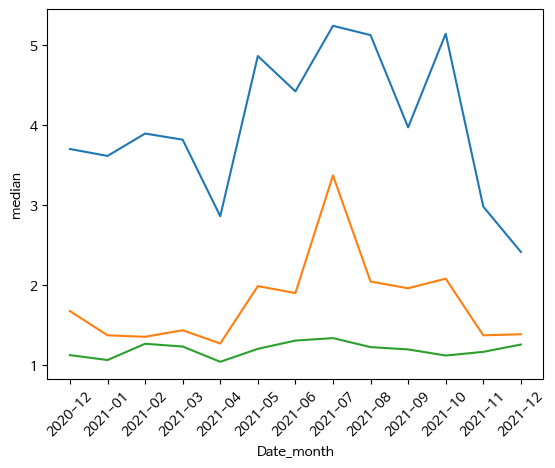

In [159]:
sns.lineplot(data=df_BRAZIL_co_paulo,x='Date_month', y='median')
sns.lineplot(data=df_BRAZIL_co_campos,x='Date_month', y='median')
sns.lineplot(data=df_BRAZIL_co_vitoria,x='Date_month', y='median')
plt.xticks( rotation=45)
plt.show()

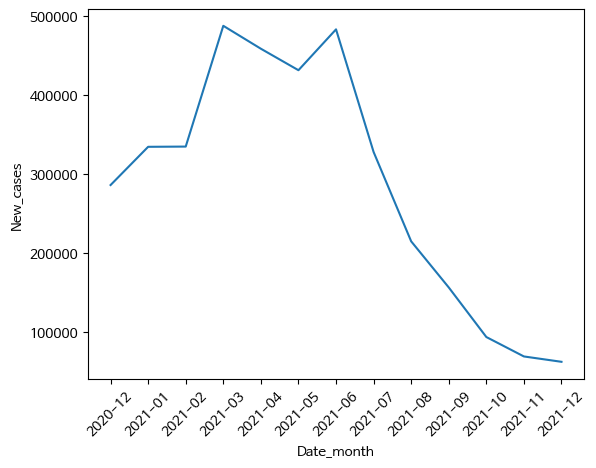

In [160]:
sns.lineplot(data=df_covid_brazil_month,x='Date_month', y='New_cases')
plt.xticks(rotation=45)
plt.show()

### so2와 코로나 확진자 비교
- paulo와 campos의 경우 확진자의 수가 감소함에 따라 이산화황의 농도도 감소하는 경향을 보임
- 반면, vitoria의 경우 확진자의 수가 감소함에 따라 이산화황의 농도도 증가하는 경향을 보임
- 하지만, paulo와 campos에서의 이산화황의 농도 감소 폭보다 vitoria에서의 이산화황의 농도 증가 폭이 더 큼
- vitoria에 화석 연료를 사용하는 공장이 코로나 시기에 가동을 멈춰 so2의 농도가 낮아진 것으로 판단

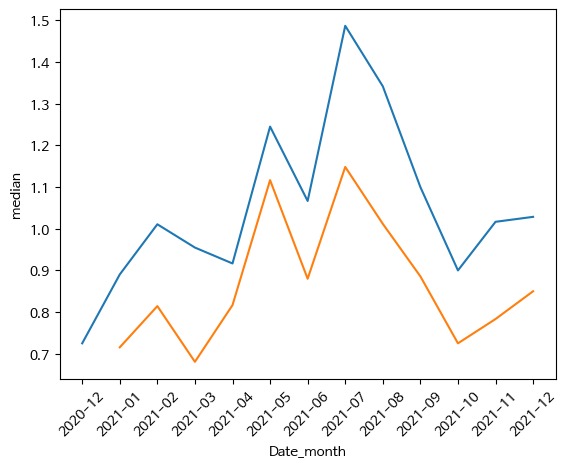

In [161]:
sns.lineplot(data=df_BRAZIL_so2_paulo,x='Date_month', y='median')
sns.lineplot(data=df_BRAZIL_so2_campos,x='Date_month', y='median')
plt.xticks( rotation=45)
plt.show()

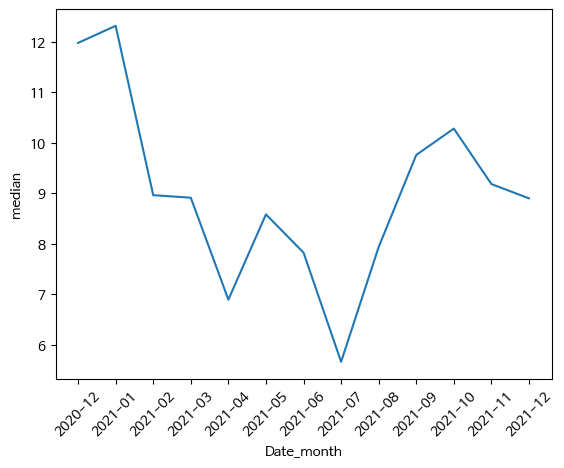

In [162]:
sns.lineplot(data=df_BRAZIL_so2_vitoria,x='Date_month', y='median')
plt.xticks( rotation=45)
plt.show()

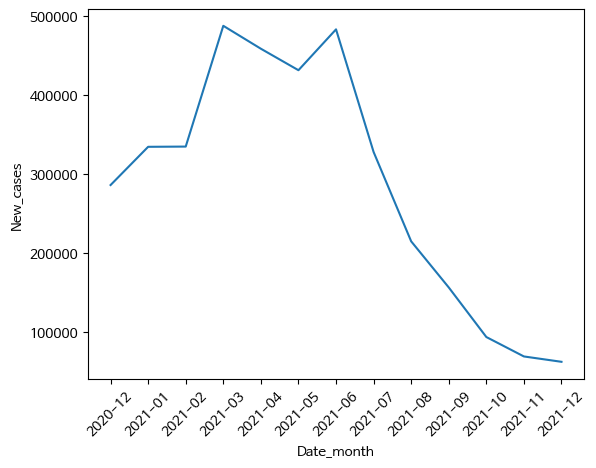

In [163]:
sns.lineplot(data=df_covid_brazil_month,x='Date_month', y='New_cases')
plt.xticks( rotation=45)
plt.show()

### no2와 코로나 확진자 비교
- 코로나 확진자의 수가 증가함에 따라 이산화질소의 농도도 증가함

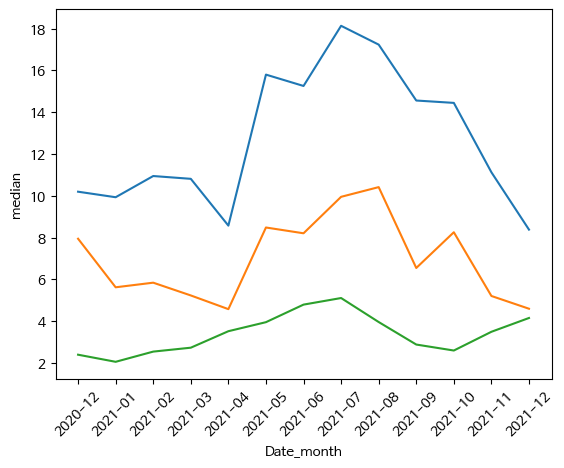

In [164]:
sns.lineplot(data=df_BRAZIL_no2_paulo,x='Date_month', y='median')
sns.lineplot(data=df_BRAZIL_no2_campos,x='Date_month', y='median')
sns.lineplot(data=df_BRAZIL_no2_vitoria,x='Date_month', y='median')
plt.xticks( rotation=45)
plt.show()

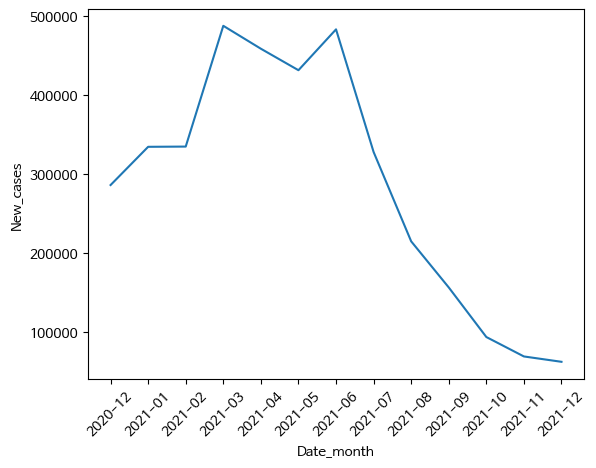

In [165]:
sns.lineplot(data=df_covid_brazil_month,x='Date_month', y='New_cases')
plt.xticks( rotation=45)
plt.show()

### o3와 코로나 확진자 비교
- 코로나 확진자의 수가 감소함에 따라 오존의 농도가 증가함

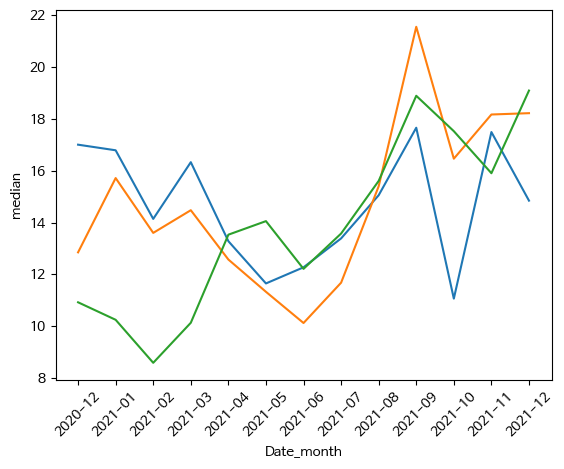

In [166]:
sns.lineplot(data=df_BRAZIL_o3_paulo,x='Date_month', y='median')
sns.lineplot(data=df_BRAZIL_o3_campos,x='Date_month', y='median')
sns.lineplot(data=df_BRAZIL_o3_vitoria,x='Date_month', y='median')
plt.xticks( rotation=45)
plt.show()

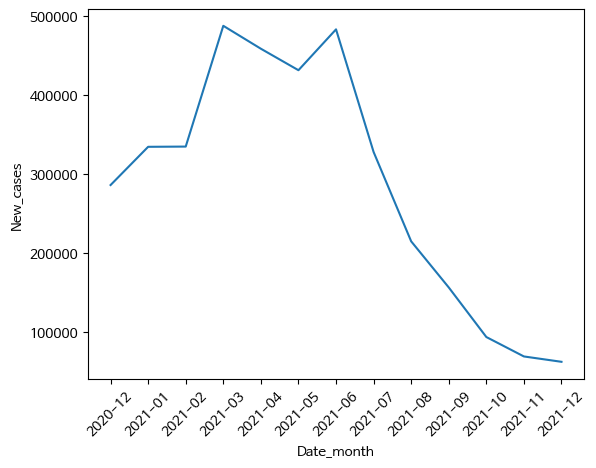

In [167]:
sns.lineplot(data=df_covid_brazil_month,x='Date_month', y='New_cases')
plt.xticks( rotation=45)
plt.show()

### pm10와 코로나 확진자 비교
- 코로나 확진자의 수가 감소함에 따라 미세먼지의 농도도 감소함

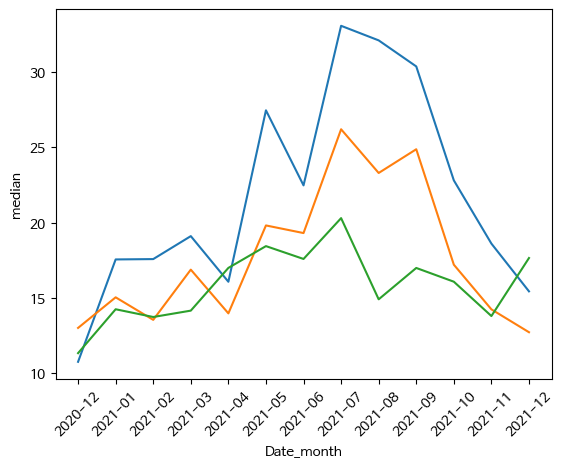

In [168]:
sns.lineplot(data=df_BRAZIL_pm10_paulo,x='Date_month', y='median')
sns.lineplot(data=df_BRAZIL_pm10_campos,x='Date_month', y='median')
sns.lineplot(data=df_BRAZIL_pm10_vitoria,x='Date_month', y='median')
plt.xticks( rotation=45)
plt.show()

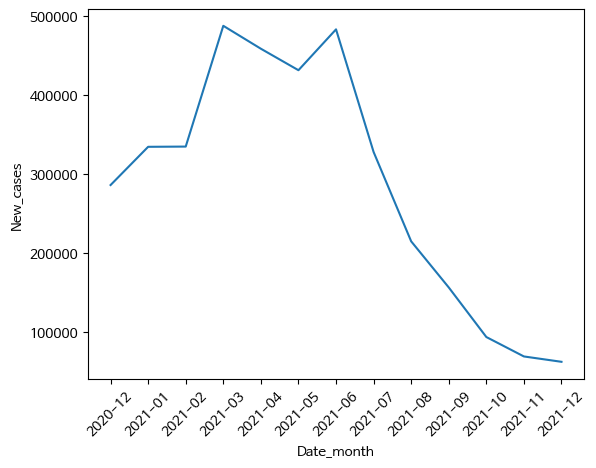

In [169]:
sns.lineplot(data=df_covid_brazil_month,x='Date_month', y='New_cases')
plt.xticks( rotation=45)
plt.show()

## 보고용 insight 작성

### 분석결과
- 2020년 12월부터 코로나의 확진자 수가 계속 증가하는 추세를 보이고, 2021년 6월부터 점차 줄어듦
- co, no2, pm10의 경우 코로나 확진자의 수가 감소함에 따라 농도가 같이 감소하는 추세를 보임
- so2의 경우 도시 마다 차이를 보임
  - 화석연료를 사용하는 빅토리아의 경우 코로나 확진자가 증가하는 시기에는 so2의 농도가 점점 낮아졌지만, 확진자가 줄어드는 시기에는 반대로 다시 올라가는 경향을 보임
  - 반면에  상파울로나 캄포스의 경우에는 코로나 확진자가 감소함에 따라 농도도 같이 감소하는 추세를 보임
- o3의 경우 코로나 확진자의 수가 감소함에 따라 농도가 다시 증가하는 추세를 보임

### 전략 제안
- 코로나 시기에 빅토리아의 so2 농도가 많이 낮아진 것으로 보아, 공장들의 화석연료 사용과 관련된 규제가 필요

### 한계
- 하지만, 여기에는 코로나 시기일 때의 데이터 밖에 없기 때문에 코로나가 없을 때의 기후 데이터와 비교할 수 없어 분석을 하기 어려움
- 이 시기의 교통량에 대한 데이터도 있으면 좀 더 다양한 분석이 가능할 것 같음